In [6]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [7]:
config="3"

In [22]:
save=np.load(f'SavedArrays/GEN{config}/Pass1/GEN{config}simfit1.npy',allow_pickle=True).item()

In [26]:
data=save['data']
bgHist=save['bgHist']
totalHist=save['totalHist']
simpHist=save['simpHist']
simnHist=save['simnHist']

In [30]:
lw=2

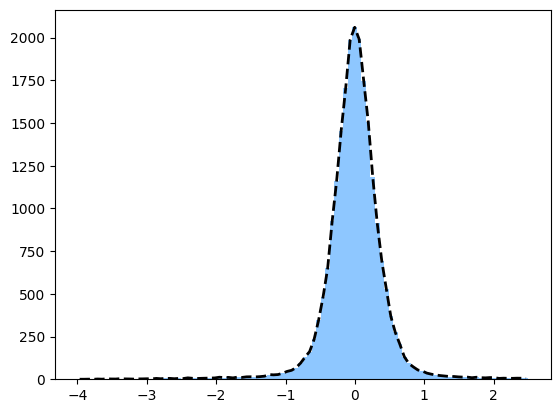

In [31]:
bin_centers,bin_contents=simnHist
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color="dodgerblue",label="MC Neutron")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)

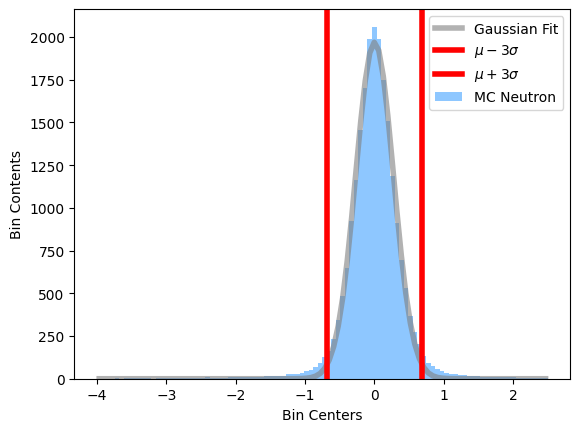

Mean: 0.0018796279691005073, Standard Deviation (Sigma): 0.2721027467570377
Number of events within ±3 sigma: 20586.562759399414


In [32]:
bin_centers,bin_contents=simnHist

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

initial_guess = [max(bin_contents), bin_centers[np.argmax(bin_contents)], 1.0]

popt, pcov = curve_fit(gaussian, bin_centers, bin_contents, p0=initial_guess)

amplitude, mean, stddev = popt

plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5, color="dodgerblue", label="MC Neutron")
x_fit = np.linspace(min(bin_centers), max(bin_centers), 100)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='grey', linewidth=4,alpha=.6, label='Gaussian Fit')
plt.axvline(mean - 2.5 * stddev, color='red', linewidth=4, label=r'$\mu - 3\sigma$')
plt.axvline(mean + 2.5 * stddev, color='red', linewidth=4, label=r'$\mu + 3\sigma$')

plt.xlabel('Bin Centers')
plt.ylabel('Bin Contents')
plt.legend()
plt.show()
lower_bound = mean - 2.5 * stddev
upper_bound = mean + 2.5 * stddev
within_3sigma = np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
print(f"Mean: {mean}, Standard Deviation (Sigma): {stddev}")
print(f"Number of events within ±3 sigma: {within_3sigma}")

In [36]:
bin_centers,bin_contents=simpHist
within_3sigmap = np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
print(f"Number of Neutron events within ±3 sigma: {within_3sigma}")
print(f"Number of Proton events within ±3 sigma: {within_3sigmap}")
print(f"Percentage of Proton events inside ±3 sigma cut on neutrons: {100*within_3sigmap/within_3sigma}")

Number of Neutron events within ±3 sigma: 20586.562759399414
Number of Proton events within ±3 sigma: 4129.493354797363
Percentage of Proton events inside ±3 sigma cut on neutrons: 20.059168706596825
